# Netflix Data Analyze

### Proses

In [122]:
# memanggil library yang akan digunakan

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Polygon
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt
import os

In [6]:
# Import dataset
df = pd.read_csv('C:/Users/putra/Desktop/netflix1.csv')
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [8]:
# Mengganti data tipe date_added Object ke date time

df["date_added"] = pd.to_datetime(df["date_added"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [9]:
# Menghapus data duplikat
df.drop_duplicates(subset = "show_id", keep = False, inplace = True)

df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV


In [21]:
#Rename nama kolom

df.rename(columns = {'title':'judul',
              'director':'direktor',
              'country':'asal_negara',
              'date_added':'waktu_ditambahkan',
              'release_year':'tahun_rilis',
              'listed_in':'genre'}, inplace = True)
df.head(5)

,show_id,type,judul,direktor,asal_negara,waktu_ditambahkan,tahun_rilis,rating,duration,genre,bulan_rilis
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September


### Analisis

In [22]:
# Menambah kolom Bulan
# Bulan masuk ke netflix

df['bulan_netflix'] = df['waktu_ditambahkan'].dt.month_name()
df

,show_id,type,judul,direktor,asal_negara,waktu_ditambahkan,tahun_rilis,rating,duration,genre,bulan_rilis
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September
...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",January
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,September
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",December
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,June


In [23]:
# Menambah kolom Tahun
# Tahun masuk ke netflix

df['tahun_netflix'] = df['waktu_ditambahkan'].dt.year
df

,show_id,type,judul,direktor,asal_negara,waktu_ditambahkan,tahun_rilis,rating,duration,genre,bulan_rilis,tahun_netflix
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",January,2017
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,September,2018
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",December,2016
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,June,2018


In [24]:
# Menghapus Kolom waktu_ditambahkan

del df['waktu_ditambahkan']

df

,show_id,type,judul,direktor,asal_negara,tahun_rilis,rating,duration,genre,bulan_rilis,tahun_netflix
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries,September,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September,2021
...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",January,2017
8786,s8798,TV Show,Zak Storm,Not Given,United States,2016,TV-Y7,3 Seasons,Kids' TV,September,2018
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",December,2016
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2016,TV-Y,1 Season,Kids' TV,June,2018


In [32]:
# Menghitung variable Type 

types = df.groupby(['type',])[ 'type'].count().reset_index(name='Jumlah Total')
types = types.set_index('type')

types

,Jumlah Total
type,
Movie,6126
TV Show,2664


In [128]:
# Mengelompokkan Negara berdasarkan type show Movie

negara = df.groupby(['asal_negara','type'])['asal_negara'].count().reset_index(name='total')
negara = negara.query("type=='Movie'")

negara.head(10)


,asal_negara,type,total
0,Argentina,Movie,56
2,Australia,Movie,61
4,Austria,Movie,8
6,Bangladesh,Movie,3
8,Belgium,Movie,9
10,Brazil,Movie,60
12,Bulgaria,Movie,5
13,Cambodia,Movie,2
14,Cameroon,Movie,1
15,Canada,Movie,187


In [110]:
# Menampilkan Negara yang paling banyak memproduksi film Movie lebih dari 100

top10 = negara.query("total > 100")

#Sorting dari terkecil ke terbesar
top10.sort_values(by=['total'], ascending = True)

,asal_negara,type,total
30,Egypt,Movie,109
112,Spain,Movie,129
34,France,Movie,148
15,Canada,Movie,187
84,Not Given,Movie,257
128,United Kingdom,Movie,387
47,India,Movie,976
130,United States,Movie,2395


### Visualisasi

Text(0.5, 1.0, 'types_of_show')

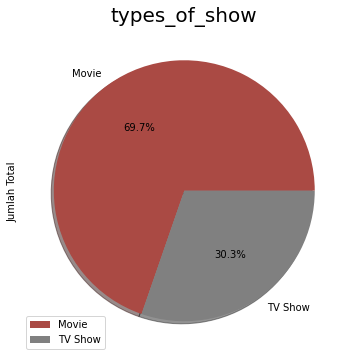

In [127]:
#Persentasi dari type 
colors = ['#AA4A44','#808080']
types.plot.pie(y='Jumlah Total',autopct='%.1f%%', shadow=True, legend= 'type' , figsize=(6,6),colors=colors)
plt.title('types_of_show', fontsize=20)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Canada'),
  Text(1, 0, 'Egypt'),
  Text(2, 0, 'France'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Not Given'),
  Text(5, 0, 'Spain'),
  Text(6, 0, 'United Kingdom'),
  Text(7, 0, 'United States')])

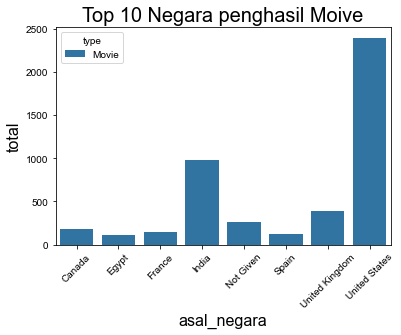

In [129]:
sns.barplot(x = top10.reset_index()['asal_negara'], 
            y = top10.reset_index()['total'],
            hue = top10.reset_index()['type']);
plt.title('Top 10 Negara penghasil Movie', fontsize = 20)
plt.xlabel('asal_negara', fontsize=16);
plt.ylabel('total', fontsize=16);
sns.set(rc = {'figure.figsize':(20,10)})
plt.xticks(rotation = 45)